# IMPORTING LIBRARIES AND LOADING DATA

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import pandasql as psql

In [2]:
#loading the data  

bsdata=pd.read_csv(r"full_data.csv",header=0)
bsdata_bk=bsdata.copy()
bsdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# DATA EXPLORATIOIN

In [3]:
#displaying the information of the file

bsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
bsdata.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
print(bsdata['gender'].unique())
print(bsdata['work_type'].unique())
print(bsdata['Residence_type'].unique())
print(bsdata['smoking_status'].unique())
print(bsdata['ever_married'].unique())

['Male' 'Female']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']


# DATA VISUALIZATION

◼ CATEGORICAL VISUALIZATION

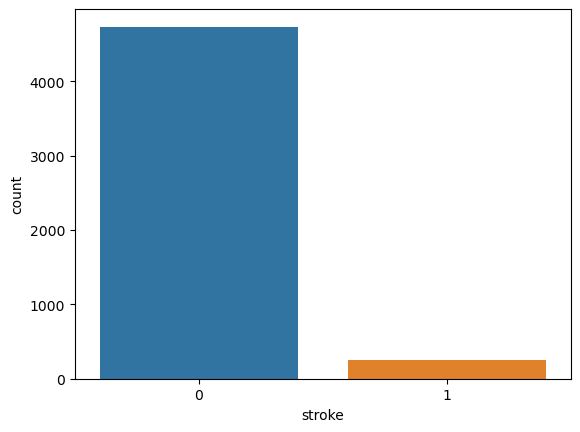

In [6]:
sns.countplot(x='stroke', data=bsdata)
plt.show()

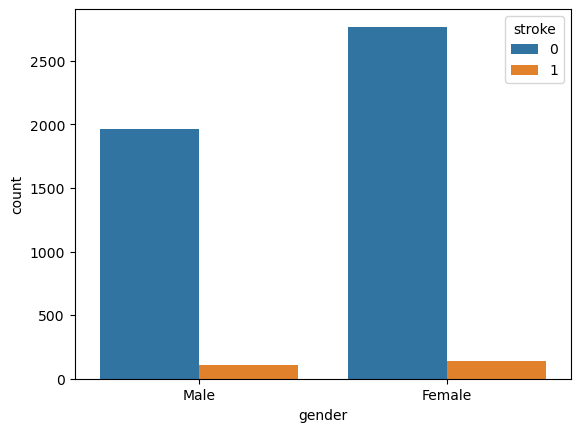

In [7]:
sns.countplot(x='gender', data=bsdata, hue='stroke')
plt.show()

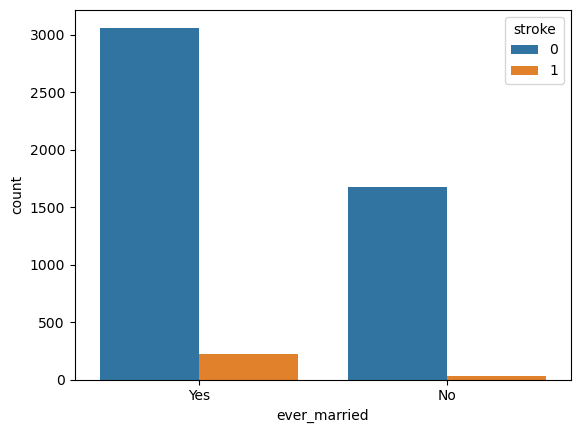

In [8]:
sns.countplot(x='ever_married', data=bsdata, hue='stroke')
plt.show()

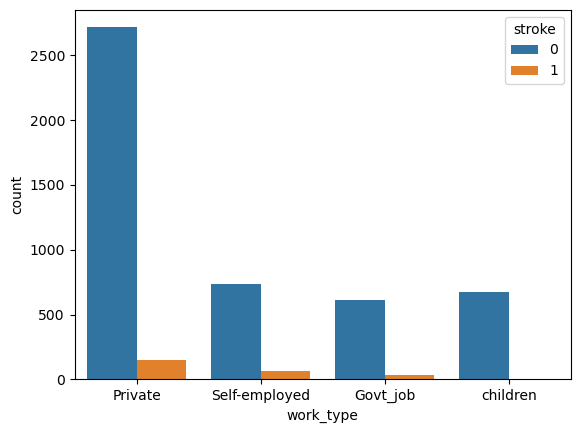

In [9]:
sns.countplot(x='work_type', data=bsdata, hue='stroke')
plt.show()

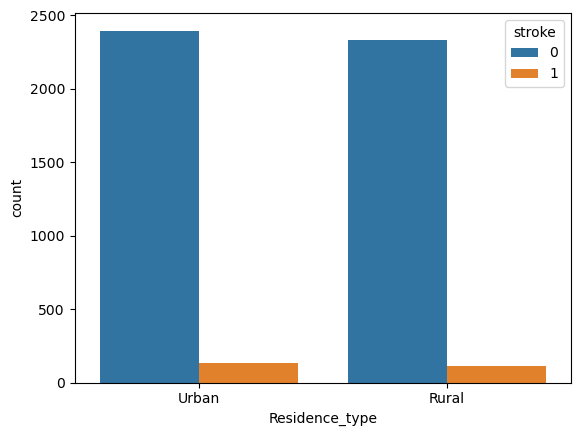

In [10]:
sns.countplot(x='Residence_type', data=bsdata, hue='stroke')
plt.show()

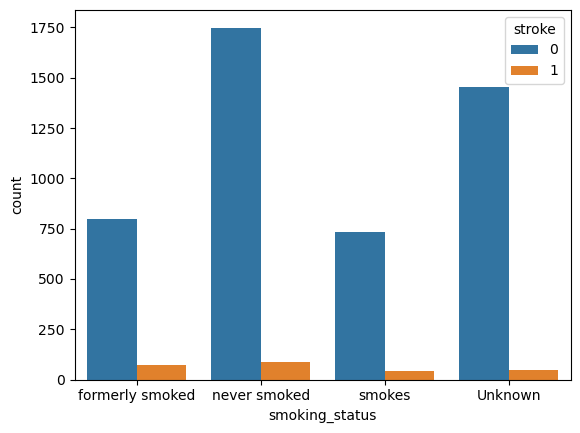

In [11]:
sns.countplot(x='smoking_status', data=bsdata, hue='stroke')
plt.show()

◼ NUMERICAL VISUALIZATION

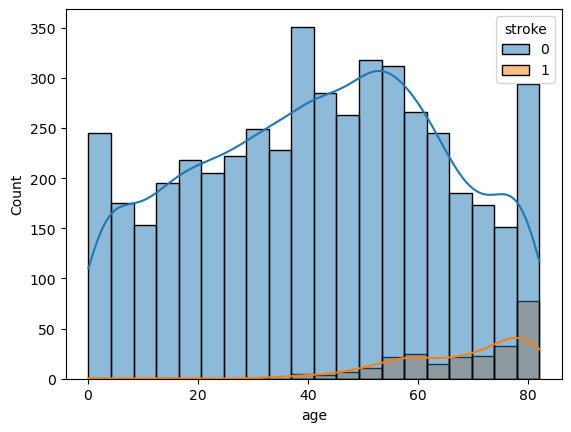

In [12]:
sns.histplot(x='age', data=bsdata, hue='stroke', kde=True)
plt.show()

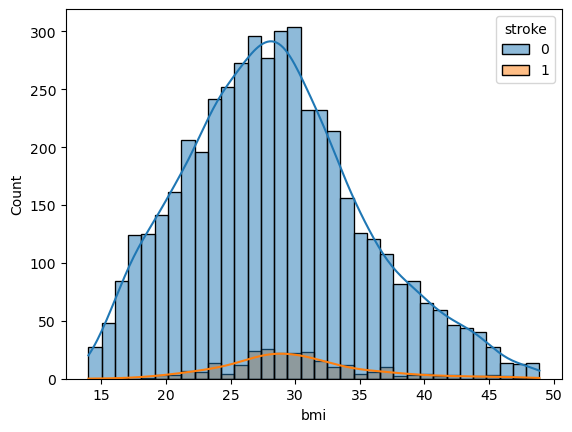

In [13]:
sns.histplot(x='bmi', data=bsdata, hue='stroke', kde=True)
plt.show()

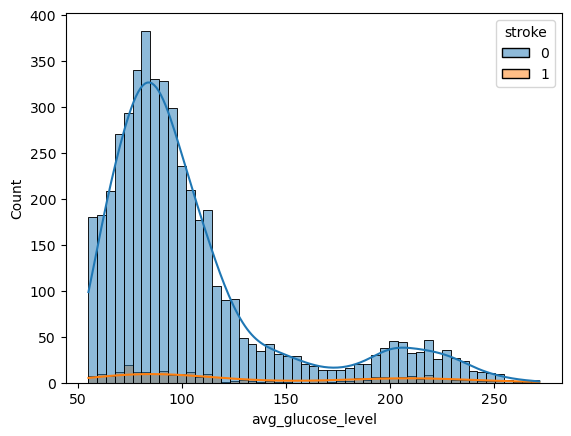

In [14]:
sns.histplot(x='avg_glucose_level', data=bsdata, hue='stroke', kde=True)
plt.show()

# DATA CLEANING

In [15]:
#checking if the duplicates are present in th data set

dup=bsdata[bsdata.duplicated(keep='last')]
dup

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [16]:
#checking if there are any null values are present

bsdata.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
#displaying the shape of the data set

bsdata.shape

(4981, 11)

In [18]:
#checking the number of values present in target variable

bsdata['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [19]:
#count the target or dependent variable by 0 or 1 and their propotion
# (>10 : 1,then the dataset is inbalance data)

stroke_count = bsdata.stroke.value_counts()
print('Class 0:',stroke_count[0])
print('Class 1:', stroke_count[1])
print('Proportion:', round(stroke_count[0] / stroke_count[1], 2), ': 1')
print('Total Bank records:', len(bsdata))

Class 0: 4733
Class 1: 248
Proportion: 19.08 : 1
Total Bank records: 4981


# HANDLING CATEGORICAL VARIABLES

In [20]:
#converting the object data type to discrete data type

bsdata['ever_married'] = [ 0 if i !='Yes' else 1 for i in bsdata['ever_married'] ]
bsdata['gender'] = [0 if i != 'Female' else 1 for i in bsdata['gender']]

In [21]:
#printing the first 5 records of the data set by converting the above columns into discrete variables

bsdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [22]:
#converting the columns having object data type to discrete data types by using get_dummies method this will increase the number of columns

bsdata=pd.get_dummies(bsdata,columns=['work_type','Residence_type','smoking_status'])
bsdata.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0
1,0,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0
2,1,49.0,0,0,1,171.23,34.4,1,0,1,0,0,0,1,0,0,0,1
3,1,79.0,1,0,1,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0
4,0,81.0,0,0,1,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0


In [23]:
# seperating the independent variables and target variable

indepvar=[]
for col in bsdata.columns:
    if col!='stroke':
        indepvar.append(col)
target='stroke'
x=bsdata[indepvar]
y=bsdata[target]

# BALANCING THE DATA USING OVER SAMPLING

In [24]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(9466, 17)
(9466,)


In [25]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6626, 17), (2840, 17), (6626,), (2840,))

# SCALING THE CONTINIOUS VALUES

In [26]:
#collecting the columns which are to be scaled

cols1=['age','avg_glucose_level','bmi']

In [27]:
#The above column values are scaled using MinMaxscaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

# BUILDING A MODEL

In [28]:
#loading the KNN_Results csv file to KNN_Results

KNN_Results=pd.read_csv(r'KNN_Results.csv',header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[1433    0]
 [  98 1309]]
Outcome values : 
 1433 0 98 1309
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      1433
           0       1.00      0.93      0.96      1407

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

Accuracy : 96.5 %
Precision : 93.6 %
Recall : 100.0 %
F1 Score : 0.967
Specificity or True Negative Rate : 93.0 %
Balanced Accuracy : 96.5 %
MCC : 0.933
roc_auc_score: 0.965


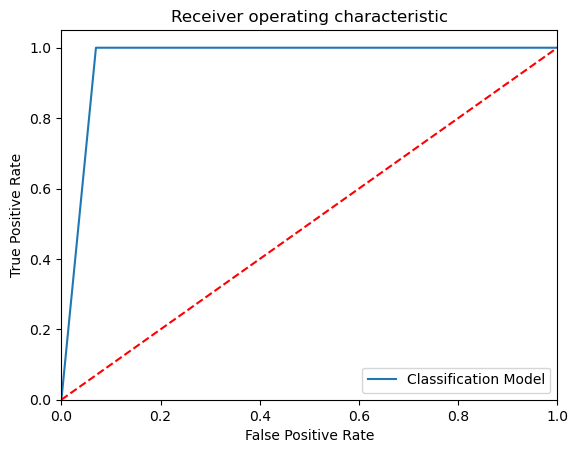

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[1433    0]
 [  98 1309]]
Outcome values : 
 1433 0 98 1309
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      1433
           0       1.00      0.93      0.96      1407

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

Accuracy : 96.5 %
Precision : 93.6 %
Recall : 100.0 %
F1 Score : 0.967
Specificity or True Negative Rate : 93.0 %
Balanced Accuracy : 96.5 %
MCC : 0.933
roc_auc_score: 0.965


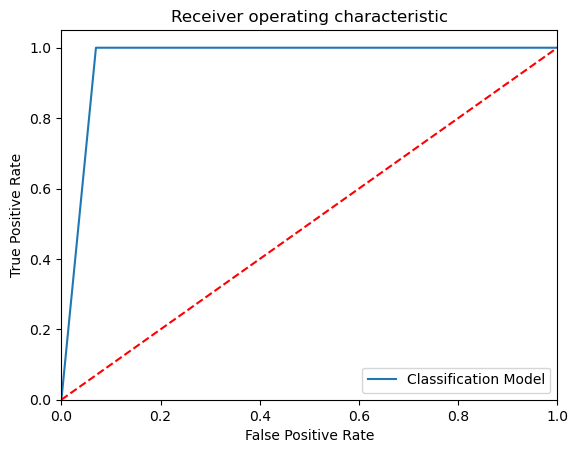

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[1433    0]
 [ 174 1233]]
Outcome values : 
 1433 0 174 1233
Classification report : 
               precision    recall  f1-score   support

           1       0.89      1.00      0.94      1433
           0       1.00      0.88      0.93      1407

    accuracy                           0.94      2840
   macro avg       0.95      0.94      0.94      2840
weighted avg       0.95      0.94      0.94      2840

Accuracy : 93.9 %
Precision : 89.2 %
Recall : 100.0 %
F1 Score : 0.943
Specificity or True Negative Rate : 87.6 %
Balanced Accuracy : 93.8 %
MCC : 0.884
roc_auc_score: 0.938


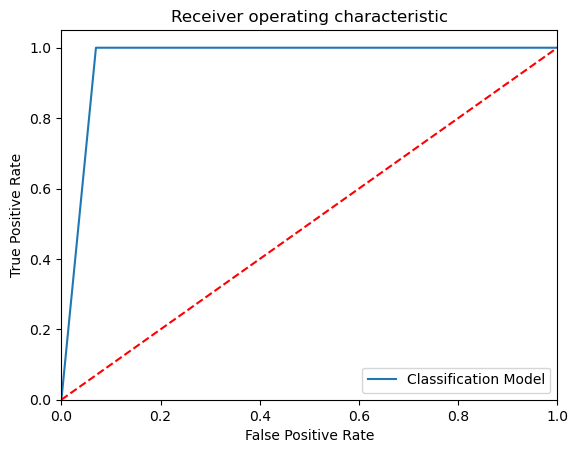

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[1433    0]
 [ 174 1233]]
Outcome values : 
 1433 0 174 1233
Classification report : 
               precision    recall  f1-score   support

           1       0.89      1.00      0.94      1433
           0       1.00      0.88      0.93      1407

    accuracy                           0.94      2840
   macro avg       0.95      0.94      0.94      2840
weighted avg       0.95      0.94      0.94      2840

Accuracy : 93.9 %
Precision : 89.2 %
Recall : 100.0 %
F1 Score : 0.943
Specificity or True Negative Rate : 87.6 %
Balanced Accuracy : 93.8 %
MCC : 0.884
roc_auc_score: 0.938


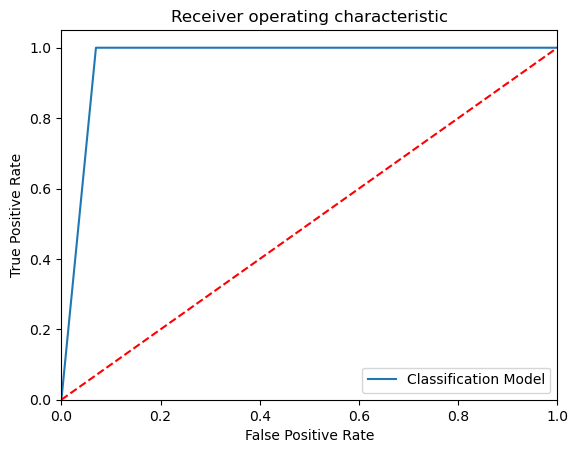

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[1433    0]
 [ 237 1170]]
Outcome values : 
 1433 0 237 1170
Classification report : 
               precision    recall  f1-score   support

           1       0.86      1.00      0.92      1433
           0       1.00      0.83      0.91      1407

    accuracy                           0.92      2840
   macro avg       0.93      0.92      0.92      2840
weighted avg       0.93      0.92      0.92      2840

Accuracy : 91.7 %
Precision : 85.8 %
Recall : 100.0 %
F1 Score : 0.924
Specificity or True Negative Rate : 83.2 %
Balanced Accuracy : 91.6 %
MCC : 0.845
roc_auc_score: 0.916


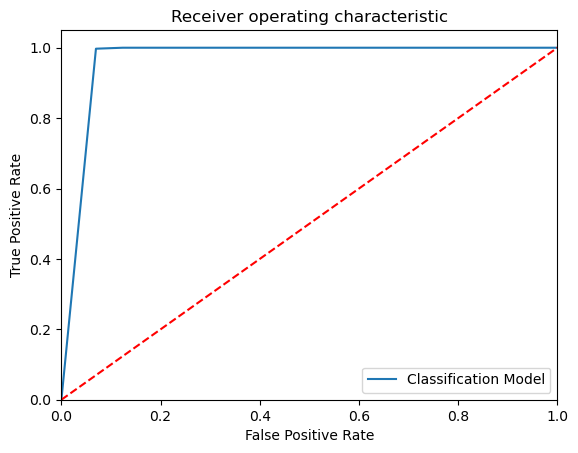

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[1433    0]
 [ 237 1170]]
Outcome values : 
 1433 0 237 1170
Classification report : 
               precision    recall  f1-score   support

           1       0.86      1.00      0.92      1433
           0       1.00      0.83      0.91      1407

    accuracy                           0.92      2840
   macro avg       0.93      0.92      0.92      2840
weighted avg       0.93      0.92      0.92      2840

Accuracy : 91.7 %
Precision : 85.8 %
Recall : 100.0 %
F1 Score : 0.924
Specificity or True Negative Rate : 83.2 %
Balanced Accuracy : 91.6 %
MCC : 0.845
roc_auc_score: 0.916


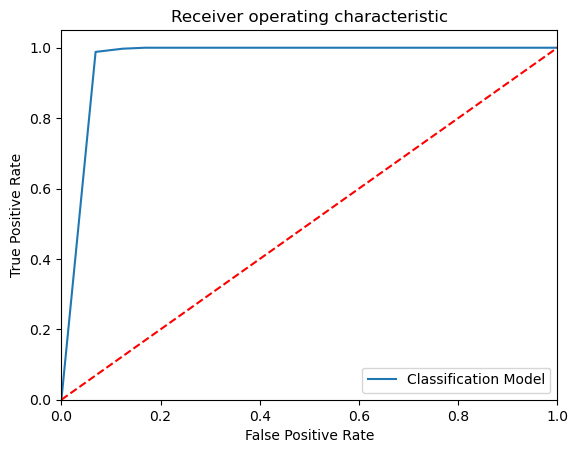

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[1433    0]
 [ 283 1124]]
Outcome values : 
 1433 0 283 1124
Classification report : 
               precision    recall  f1-score   support

           1       0.84      1.00      0.91      1433
           0       1.00      0.80      0.89      1407

    accuracy                           0.90      2840
   macro avg       0.92      0.90      0.90      2840
weighted avg       0.92      0.90      0.90      2840

Accuracy : 90.0 %
Precision : 83.5 %
Recall : 100.0 %
F1 Score : 0.91
Specificity or True Negative Rate : 79.9 %
Balanced Accuracy : 90.0 %
MCC : 0.817
roc_auc_score: 0.899


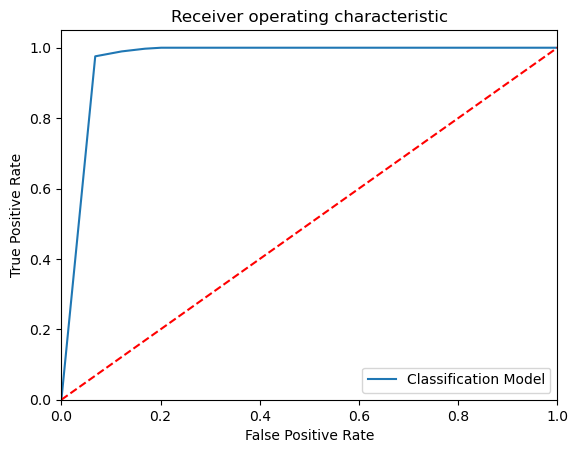

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[1433    0]
 [ 283 1124]]
Outcome values : 
 1433 0 283 1124
Classification report : 
               precision    recall  f1-score   support

           1       0.84      1.00      0.91      1433
           0       1.00      0.80      0.89      1407

    accuracy                           0.90      2840
   macro avg       0.92      0.90      0.90      2840
weighted avg       0.92      0.90      0.90      2840

Accuracy : 90.0 %
Precision : 83.5 %
Recall : 100.0 %
F1 Score : 0.91
Specificity or True Negative Rate : 79.9 %
Balanced Accuracy : 90.0 %
MCC : 0.817
roc_auc_score: 0.899


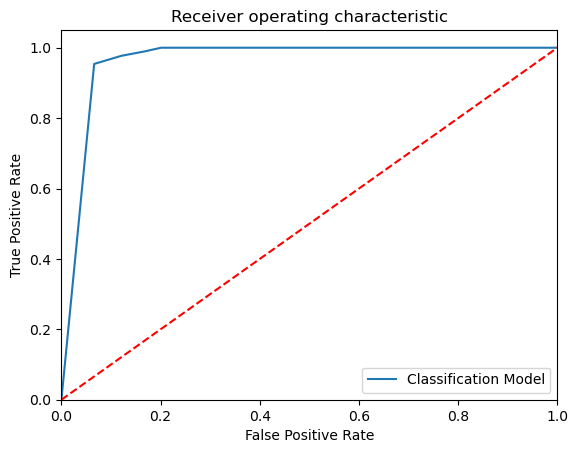

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[1433    0]
 [ 323 1084]]
Outcome values : 
 1433 0 323 1084
Classification report : 
               precision    recall  f1-score   support

           1       0.82      1.00      0.90      1433
           0       1.00      0.77      0.87      1407

    accuracy                           0.89      2840
   macro avg       0.91      0.89      0.88      2840
weighted avg       0.91      0.89      0.88      2840

Accuracy : 88.6 %
Precision : 81.6 %
Recall : 100.0 %
F1 Score : 0.899
Specificity or True Negative Rate : 77.0 %
Balanced Accuracy : 88.5 %
MCC : 0.793
roc_auc_score: 0.885


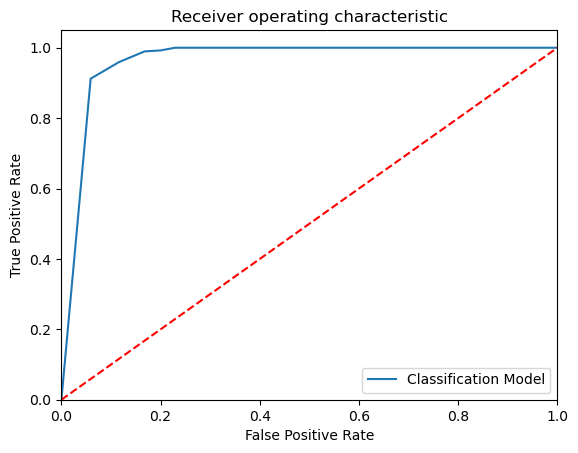

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[1422   11]
 [ 321 1086]]
Outcome values : 
 1422 11 321 1086
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.99      0.90      1433
           0       0.99      0.77      0.87      1407

    accuracy                           0.88      2840
   macro avg       0.90      0.88      0.88      2840
weighted avg       0.90      0.88      0.88      2840

Accuracy : 88.3 %
Precision : 81.6 %
Recall : 99.2 %
F1 Score : 0.895
Specificity or True Negative Rate : 77.2 %
Balanced Accuracy : 88.2 %
MCC : 0.785
roc_auc_score: 0.882


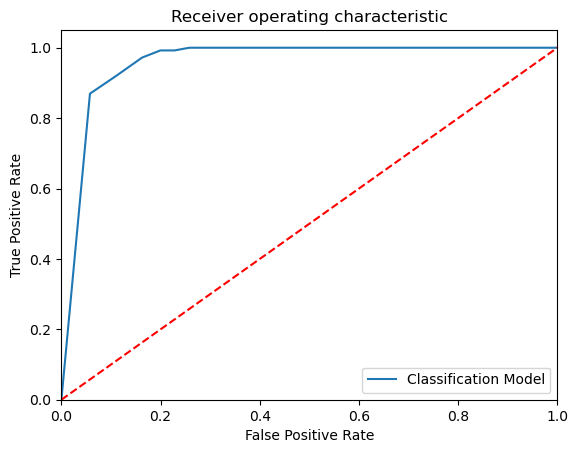

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[1422   11]
 [ 361 1046]]
Outcome values : 
 1422 11 361 1046
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.99      0.88      1433
           0       0.99      0.74      0.85      1407

    accuracy                           0.87      2840
   macro avg       0.89      0.87      0.87      2840
weighted avg       0.89      0.87      0.87      2840

Accuracy : 86.9 %
Precision : 79.8 %
Recall : 99.2 %
F1 Score : 0.884
Specificity or True Negative Rate : 74.3 %
Balanced Accuracy : 86.7 %
MCC : 0.761
roc_auc_score: 0.868


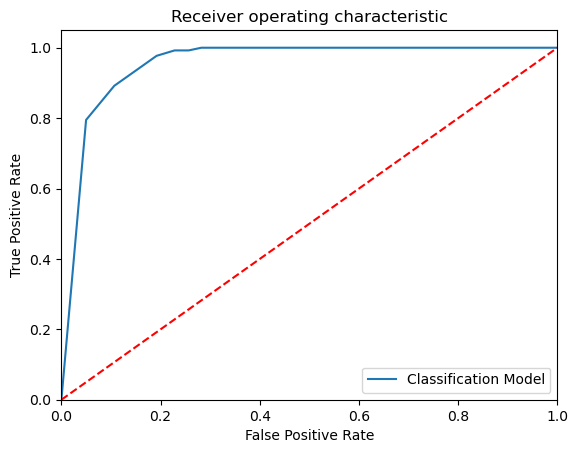

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[1422   11]
 [ 361 1046]]
Outcome values : 
 1422 11 361 1046
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.99      0.88      1433
           0       0.99      0.74      0.85      1407

    accuracy                           0.87      2840
   macro avg       0.89      0.87      0.87      2840
weighted avg       0.89      0.87      0.87      2840

Accuracy : 86.9 %
Precision : 79.8 %
Recall : 99.2 %
F1 Score : 0.884
Specificity or True Negative Rate : 74.3 %
Balanced Accuracy : 86.7 %
MCC : 0.761
roc_auc_score: 0.868


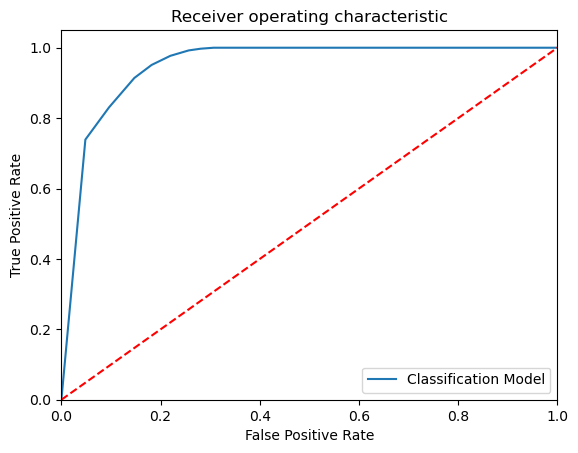

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[1429    4]
 [ 395 1012]]
Outcome values : 
 1429 4 395 1012
Classification report : 
               precision    recall  f1-score   support

           1       0.78      1.00      0.88      1433
           0       1.00      0.72      0.84      1407

    accuracy                           0.86      2840
   macro avg       0.89      0.86      0.86      2840
weighted avg       0.89      0.86      0.86      2840

Accuracy : 86.0 %
Precision : 78.3 %
Recall : 99.7 %
F1 Score : 0.877
Specificity or True Negative Rate : 71.9 %
Balanced Accuracy : 85.8 %
MCC : 0.747
roc_auc_score: 0.858


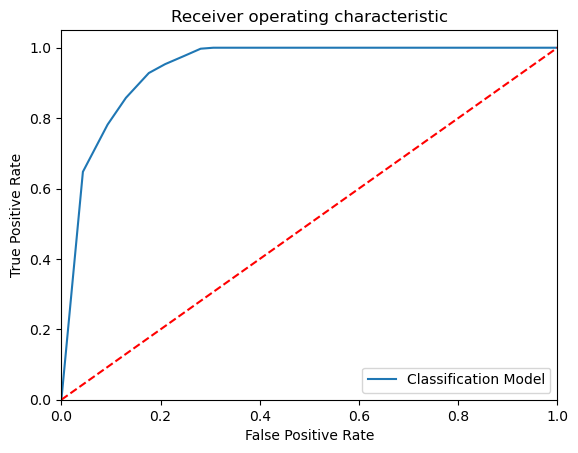

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[1407   26]
 [ 380 1027]]
Outcome values : 
 1407 26 380 1027
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.98      0.87      1433
           0       0.98      0.73      0.83      1407

    accuracy                           0.86      2840
   macro avg       0.88      0.86      0.85      2840
weighted avg       0.88      0.86      0.85      2840

Accuracy : 85.7 %
Precision : 78.7 %
Recall : 98.2 %
F1 Score : 0.874
Specificity or True Negative Rate : 73.0 %
Balanced Accuracy : 85.6 %
MCC : 0.737
roc_auc_score: 0.856


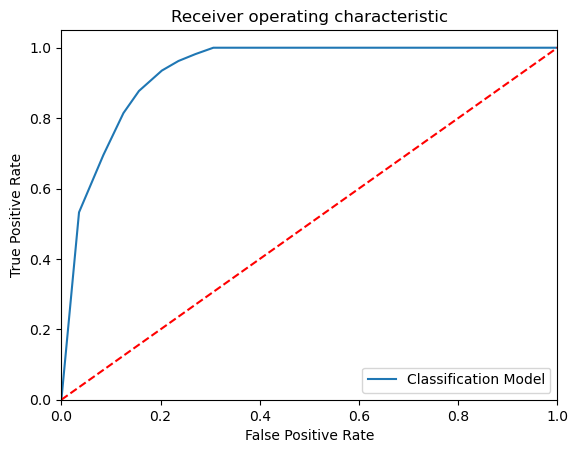

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[1417   16]
 [ 416  991]]
Outcome values : 
 1417 16 416 991
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.99      0.87      1433
           0       0.98      0.70      0.82      1407

    accuracy                           0.85      2840
   macro avg       0.88      0.85      0.84      2840
weighted avg       0.88      0.85      0.84      2840

Accuracy : 84.8 %
Precision : 77.3 %
Recall : 98.9 %
F1 Score : 0.868
Specificity or True Negative Rate : 70.4 %
Balanced Accuracy : 84.6 %
MCC : 0.724
roc_auc_score: 0.847


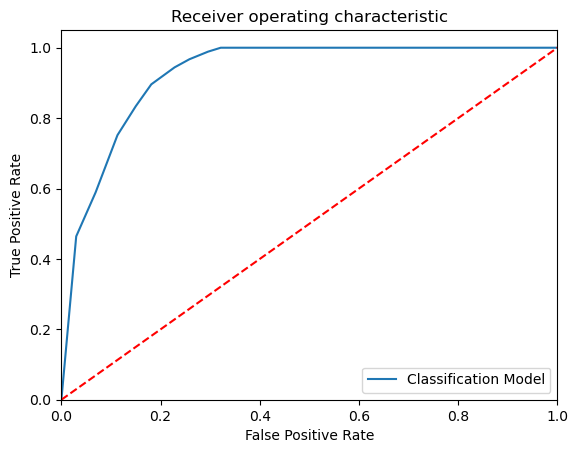

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[1396   37]
 [ 400 1007]]
Outcome values : 
 1396 37 400 1007
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.97      0.86      1433
           0       0.96      0.72      0.82      1407

    accuracy                           0.85      2840
   macro avg       0.87      0.84      0.84      2840
weighted avg       0.87      0.85      0.84      2840

Accuracy : 84.6 %
Precision : 77.7 %
Recall : 97.4 %
F1 Score : 0.865
Specificity or True Negative Rate : 71.6 %
Balanced Accuracy : 84.5 %
MCC : 0.715
roc_auc_score: 0.845


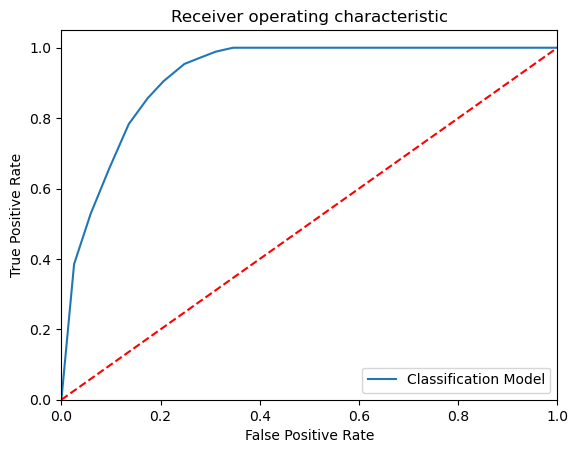

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[1406   27]
 [ 423  984]]
Outcome values : 
 1406 27 423 984
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.98      0.86      1433
           0       0.97      0.70      0.81      1407

    accuracy                           0.84      2840
   macro avg       0.87      0.84      0.84      2840
weighted avg       0.87      0.84      0.84      2840

Accuracy : 84.2 %
Precision : 76.9 %
Recall : 98.1 %
F1 Score : 0.862
Specificity or True Negative Rate : 69.9 %
Balanced Accuracy : 84.0 %
MCC : 0.711
roc_auc_score: 0.84


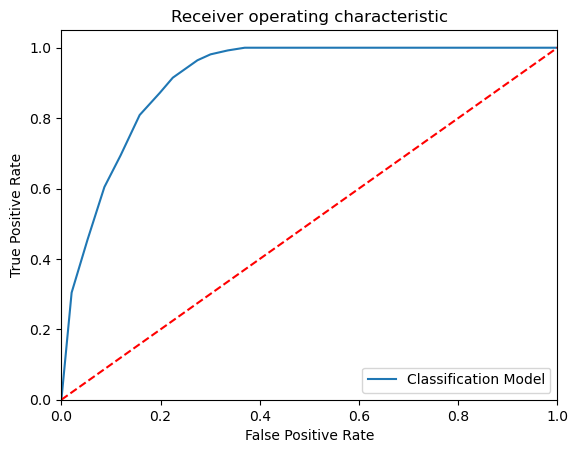

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[1392   41]
 [ 411  996]]
Outcome values : 
 1392 41 411 996
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.97      0.86      1433
           0       0.96      0.71      0.82      1407

    accuracy                           0.84      2840
   macro avg       0.87      0.84      0.84      2840
weighted avg       0.87      0.84      0.84      2840

Accuracy : 84.1 %
Precision : 77.2 %
Recall : 97.1 %
F1 Score : 0.86
Specificity or True Negative Rate : 70.8 %
Balanced Accuracy : 83.9 %
MCC : 0.705
roc_auc_score: 0.84


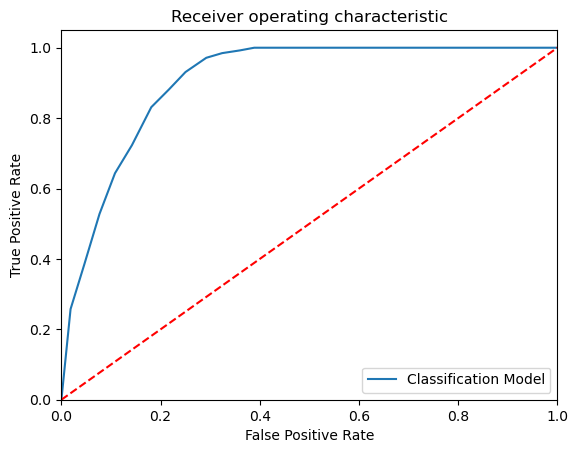

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[1397   36]
 [ 444  963]]
Outcome values : 
 1397 36 444 963
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.97      0.85      1433
           0       0.96      0.68      0.80      1407

    accuracy                           0.83      2840
   macro avg       0.86      0.83      0.83      2840
weighted avg       0.86      0.83      0.83      2840

Accuracy : 83.1 %
Precision : 75.9 %
Recall : 97.5 %
F1 Score : 0.853
Specificity or True Negative Rate : 68.4 %
Balanced Accuracy : 83.0 %
MCC : 0.69
roc_auc_score: 0.83


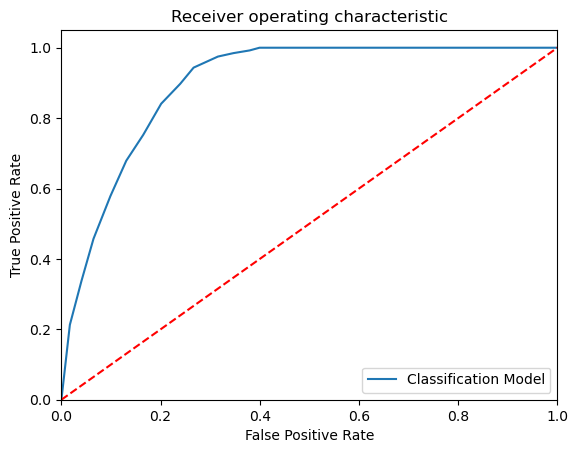

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[1357   76]
 [ 410  997]]
Outcome values : 
 1357 76 410 997
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.95      0.85      1433
           0       0.93      0.71      0.80      1407

    accuracy                           0.83      2840
   macro avg       0.85      0.83      0.83      2840
weighted avg       0.85      0.83      0.83      2840

Accuracy : 82.9 %
Precision : 76.8 %
Recall : 94.7 %
F1 Score : 0.848
Specificity or True Negative Rate : 70.9 %
Balanced Accuracy : 82.8 %
MCC : 0.676
roc_auc_score: 0.828


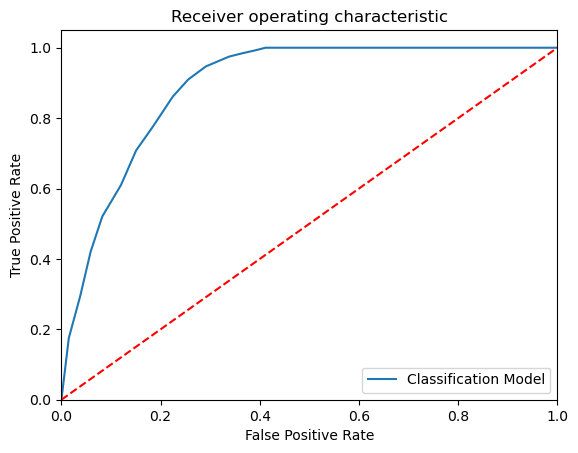

In [29]:
# Build KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [30]:
#displaying the results of knn alogorithm with different n_neighbours

KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,1433,0,98,1309,0.965,0.936,1.000,0.967,0.930,0.933,0.965174,0.965
1,KNeighborsClassifier(n_neighbors=2),2,1433,0,98,1309,0.965,0.936,1.000,0.967,0.930,0.933,0.965174,0.965
2,KNeighborsClassifier(n_neighbors=3),3,1433,0,174,1233,0.939,0.892,1.000,0.943,0.876,0.884,0.938166,0.938
3,KNeighborsClassifier(n_neighbors=4),4,1433,0,174,1233,0.939,0.892,1.000,0.943,0.876,0.884,0.938166,0.938
4,KNeighborsClassifier(),5,1433,0,237,1170,0.917,0.858,1.000,0.924,0.832,0.845,0.915778,0.916
5,KNeighborsClassifier(n_neighbors=6),6,1433,0,237,1170,0.917,0.858,1.000,0.924,0.832,0.845,0.915778,0.916
6,KNeighborsClassifier(n_neighbors=7),7,1433,0,283,1124,0.900,0.835,1.000,0.910,0.799,0.817,0.899431,0.900
7,KNeighborsClassifier(n_neighbors=8),8,1433,0,283,1124,0.900,0.835,1.000,0.910,0.799,0.817,0.899431,0.900
8,KNeighborsClassifier(n_neighbors=9),9,1433,0,323,1084,0.886,0.816,1.000,0.899,0.770,0.793,0.885217,0.885
9,KNeighborsClassifier(n_neighbors=10),10,1422,11,321,1086,0.883,0.816,0.992,0.895,0.772,0.785,0.882089,0.882


# SVM ALGORITHM

In [31]:
#Loading the EMResults file 

EMResults1=pd.read_csv(r"EMResults.csv",header=0)
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  SVC(kernel='linear', probability=True)
Confusion matrix : 
 [[1197  236]
 [ 388 1019]]
Outcome values : 
 1197 236 388 1019
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.84      0.79      1433
           0       0.81      0.72      0.77      1407

    accuracy                           0.78      2840
   macro avg       0.78      0.78      0.78      2840
weighted avg       0.78      0.78      0.78      2840

Accuracy : 78.0 %
Precision : 75.5 %
Recall : 83.5 %
F1 Score : 0.793
Specificity or True Negative Rate : 72.4 %
Balanced Accuracy : 78.0 %
MCC : 0.563
roc_auc_score: 0.78


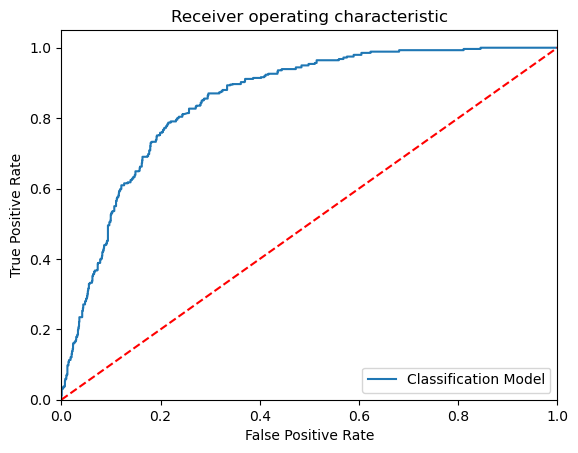

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[1195  238]
 [ 359 1048]]
Outcome values : 
 1195 238 359 1048
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.83      0.80      1433
           0       0.81      0.74      0.78      1407

    accuracy                           0.79      2840
   macro avg       0.79      0.79      0.79      2840
weighted avg       0.79      0.79      0.79      2840

Accuracy : 79.0 %
Precision : 76.9 %
Recall : 83.4 %
F1 Score : 0.8
Specificity or True Negative Rate : 74.5 %
Balanced Accuracy : 79.0 %
MCC : 0.581
roc_auc_score: 0.789


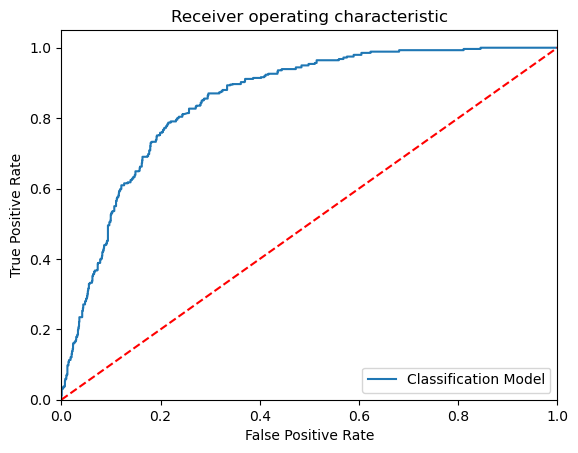

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[1248  185]
 [ 333 1074]]
Outcome values : 
 1248 185 333 1074
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.87      0.83      1433
           0       0.85      0.76      0.81      1407

    accuracy                           0.82      2840
   macro avg       0.82      0.82      0.82      2840
weighted avg       0.82      0.82      0.82      2840

Accuracy : 81.8 %
Precision : 78.9 %
Recall : 87.1 %
F1 Score : 0.828
Specificity or True Negative Rate : 76.3 %
Balanced Accuracy : 81.7 %
MCC : 0.638
roc_auc_score: 0.817


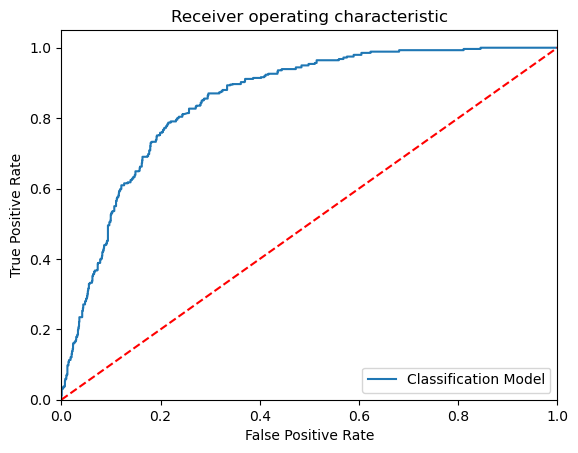

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='sigmoid', probability=True,
    random_state=42)
Confusion matrix : 
 [[844 589]
 [592 815]]
Outcome values : 
 844 589 592 815
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.59      0.59      1433
           0       0.58      0.58      0.58      1407

    accuracy                           0.58      2840
   macro avg       0.58      0.58      0.58      2840
weighted avg       0.58      0.58      0.58      2840

Accuracy : 58.4 %
Precision : 58.8 %
Recall : 58.9 %
F1 Score : 0.588
Specificity or True Negative Rate : 57.9 %
Balanced Accuracy : 58.4 %
MCC : 0.168
roc_auc_score: 0.584


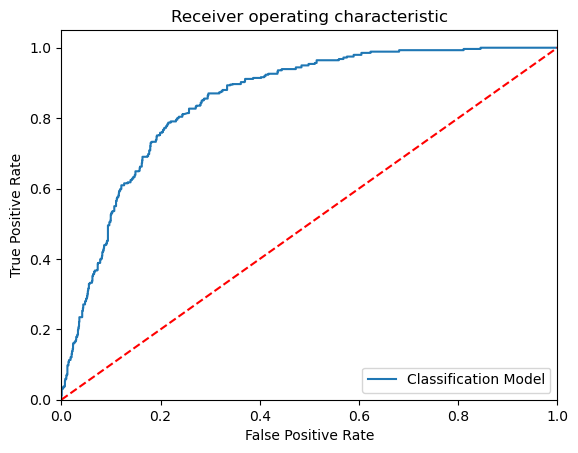

-----------------------------------------------------------------------------------------------------


In [32]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)
ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

mm=[ModelSVM1,ModelSVMPoly,ModelSVMGaussian,ModelSVMSig]

for model in mm:

    # Train the model with train data 
    
    model = model.fit(x_train, y_train)

    # Predict the model with test data set

    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)

    # Print the model name
    
    print('Model Name: ', model)

    # Confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show() 
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : model,
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
    EMResults1 = EMResults1.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------------------------------

In [33]:
EMResults1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"SVC(kernel='linear', probability=True)",1197,236,388,1019,0.780,0.755,0.835,0.793,0.724,0.563,0.779773,0.780
1,"SVC(degree=2, kernel='poly', probability=True)",1195,238,359,1048,0.790,0.769,0.834,0.800,0.745,0.581,0.789381,0.790
2,"SVC(class_weight='balanced', probability=True,...",1248,185,333,1074,0.818,0.789,0.871,0.828,0.763,0.638,0.817113,0.817
3,"SVC(class_weight='balanced', kernel='sigmoid',...",844,589,592,815,0.584,0.588,0.589,0.588,0.579,0.168,0.584110,0.584


# COMPARING THE CLASSIFICATION ALGORITHMS

In [34]:
#Loading the EMResults file 

EMResults=pd.read_csv(r"EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[1171  262]
 [ 356 1051]]
Outcome values : 
 1171 262 356 1051
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.82      0.79      1433
           0       0.80      0.75      0.77      1407

    accuracy                           0.78      2840
   macro avg       0.78      0.78      0.78      2840
weighted avg       0.78      0.78      0.78      2840

Accuracy : 78.2 %
Precision : 76.7 %
Recall : 81.7 %
F1 Score : 0.791
Specificity or True Negative Rate : 74.7 %
Balanced Accuracy : 78.2 %
MCC : 0.566
roc_auc_score: 0.782


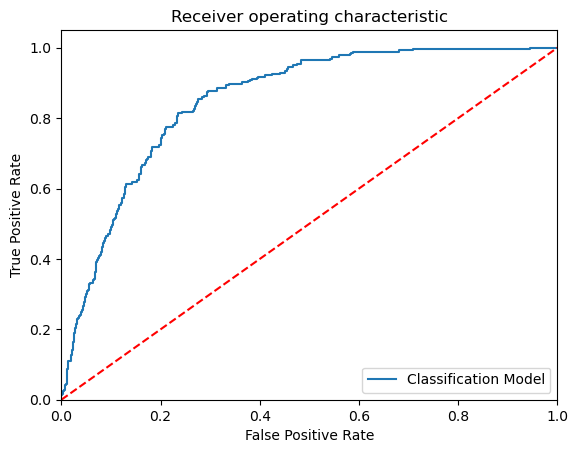

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1343   90]
 [  80 1327]]
Outcome values : 
 1343 90 80 1327
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.94      0.94      1433
           0       0.94      0.94      0.94      1407

    accuracy                           0.94      2840
   macro avg       0.94      0.94      0.94      2840
weighted avg       0.94      0.94      0.94      2840

Accuracy : 94.0 %
Precision : 94.4 %
Recall : 93.7 %
F1 Score : 0.94
Specificity or True Negative Rate : 94.3 %
Balanced Accuracy : 94.0 %
MCC : 0.88
roc_auc_score: 0.94


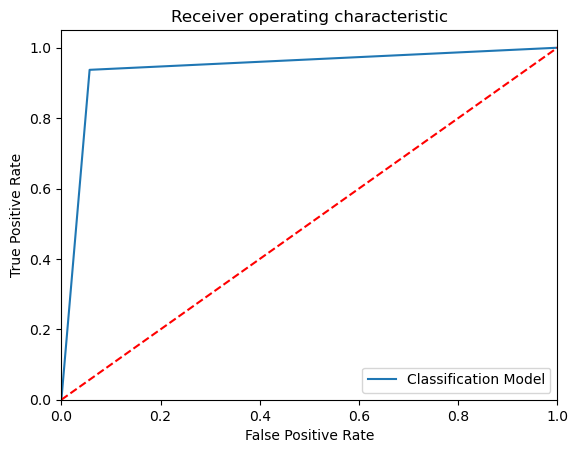

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1433    0]
 [  28 1379]]
Outcome values : 
 1433 0 28 1379
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1433
           0       1.00      0.98      0.99      1407

    accuracy                           0.99      2840
   macro avg       0.99      0.99      0.99      2840
weighted avg       0.99      0.99      0.99      2840

Accuracy : 99.0 %
Precision : 98.1 %
Recall : 100.0 %
F1 Score : 0.99
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 99.0 %
MCC : 0.98
roc_auc_score: 0.99


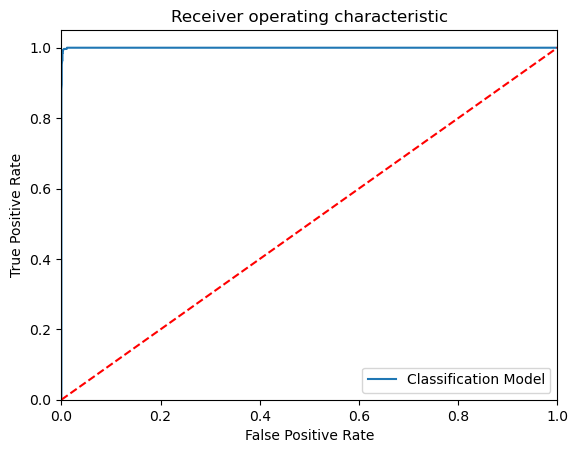

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[1433    0]
 [  29 1378]]
Outcome values : 
 1433 0 29 1378
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1433
           0       1.00      0.98      0.99      1407

    accuracy                           0.99      2840
   macro avg       0.99      0.99      0.99      2840
weighted avg       0.99      0.99      0.99      2840

Accuracy : 99.0 %
Precision : 98.0 %
Recall : 100.0 %
F1 Score : 0.99
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 99.0 %
MCC : 0.98
roc_auc_score: 0.99


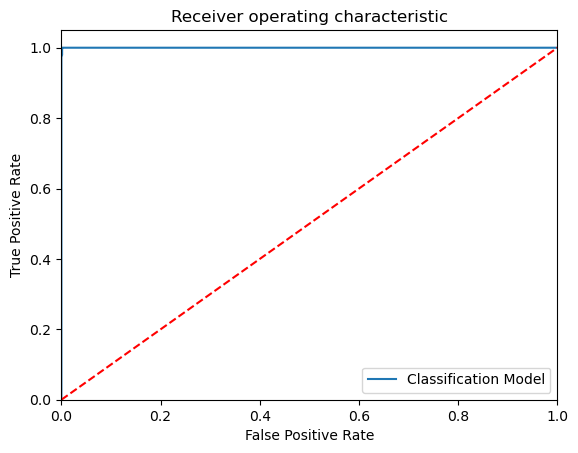

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[1433    0]
 [  98 1309]]
Outcome values : 
 1433 0 98 1309
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      1433
           0       1.00      0.93      0.96      1407

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

Accuracy : 96.5 %
Precision : 93.6 %
Recall : 100.0 %
F1 Score : 0.967
Specificity or True Negative Rate : 93.0 %
Balanced Accuracy : 96.5 %
MCC : 0.933
roc_auc_score: 0.965


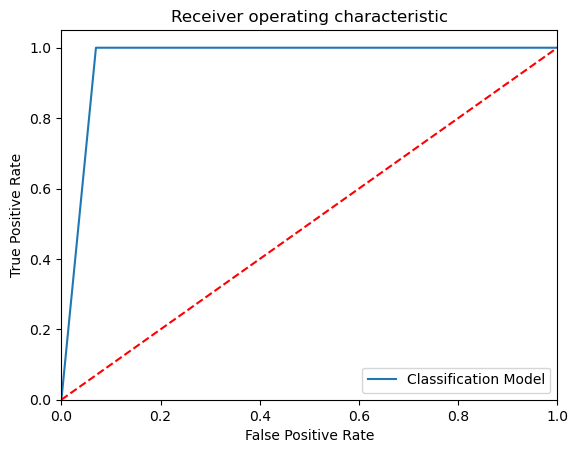

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[1248  185]
 [ 333 1074]]
Outcome values : 
 1248 185 333 1074
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.87      0.83      1433
           0       0.85      0.76      0.81      1407

    accuracy                           0.82      2840
   macro avg       0.82      0.82      0.82      2840
weighted avg       0.82      0.82      0.82      2840

Accuracy : 81.8 %
Precision : 78.9 %
Recall : 87.1 %
F1 Score : 0.828
Specificity or True Negative Rate : 76.3 %
Balanced Accuracy : 81.7 %
MCC : 0.638
roc_auc_score: 0.817


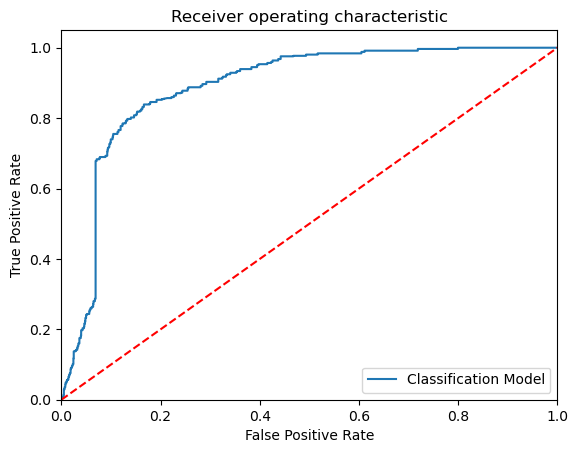

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[1230  203]
 [ 550  857]]
Outcome values : 
 1230 203 550 857
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.86      0.77      1433
           0       0.81      0.61      0.69      1407

    accuracy                           0.73      2840
   macro avg       0.75      0.73      0.73      2840
weighted avg       0.75      0.73      0.73      2840

Accuracy : 73.5 %
Precision : 69.1 %
Recall : 85.8 %
F1 Score : 0.766
Specificity or True Negative Rate : 60.9 %
Balanced Accuracy : 73.4 %
MCC : 0.483
roc_auc_score: 0.734


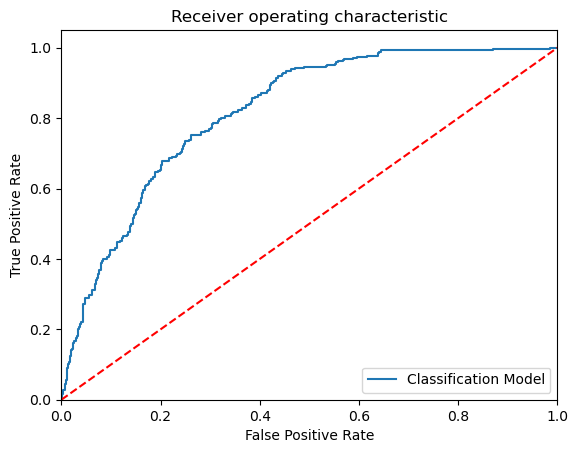

-----------------------------------------------------------------------------------------------------


In [35]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=2)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [36]:
#displaying the results of all classifying algorithms

EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1171,262,356,1051,0.782,0.767,0.817,0.791,0.747,0.566,0.782073,0.782
1,DecisionTreeClassifier(),1343,90,80,1327,0.940,0.944,0.937,0.940,0.943,0.880,0.940168,0.940
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1433,0,28,1379,0.990,0.981,1.000,0.990,0.980,0.980,0.990050,0.990
3,"(ExtraTreeClassifier(random_state=200755450), ...",1433,0,29,1378,0.990,0.980,1.000,0.990,0.979,0.980,0.989694,0.990
4,KNeighborsClassifier(n_neighbors=2),1433,0,98,1309,0.965,0.936,1.000,0.967,0.930,0.933,0.965174,0.965
5,"SVC(class_weight='balanced', probability=True,...",1248,185,333,1074,0.818,0.789,0.871,0.828,0.763,0.638,0.817113,0.817
6,GaussianNB(),1230,203,550,857,0.735,0.691,0.858,0.766,0.609,0.483,0.733718,0.734


# SELECTING THE BEST ALGORITHM

In [37]:
#from the above results random forest is the best suitable for this data
#so predicting the target varibale uisng random forest algorithm

y_predRF=ModelRF.predict(x_test)

y_predRF

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [45]:
#Adding the results to the data set and displaying the results

Results=pd.DataFrame({'stroke_A':y_test,'stroke_P':y_predRF})
ResultsFinal=bsdata_bk.merge(Results,left_index=True,right_index=True)
ResultsFinal.sample(12)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_A,stroke_P
4151,Male,71.0,1,0,Yes,Private,Rural,229.73,30.4,never smoked,0,0,0
3365,Female,27.0,0,0,Yes,Private,Rural,111.96,28.2,never smoked,0,0,0
4623,Male,13.0,0,0,No,children,Urban,87.98,19.8,Unknown,0,0,0
3703,Female,52.0,0,0,Yes,Private,Rural,200.46,25.0,Unknown,0,0,0
2939,Male,56.0,0,0,Yes,Private,Rural,82.40,30.9,smokes,0,0,0
2913,Female,42.0,0,0,Yes,Govt_job,Rural,157.67,22.7,formerly smoked,0,0,0
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,1,1
169,Male,78.0,0,0,No,Self-employed,Urban,90.19,26.9,never smoked,1,1,1
3037,Female,50.0,0,0,Yes,Govt_job,Urban,151.25,31.5,never smoked,0,0,0
676,Male,46.0,0,0,Yes,Self-employed,Urban,55.83,26.4,never smoked,0,0,0
